In [132]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [133]:
ci = pd.read_csv('data/consumer-index.csv')
prices = pd.read_csv('data/producer-price.csv')
xchange = pd.read_csv('data/exchange-rates.csv')


In [134]:
ci[(ci['Area']=='Pakistan') & (ci['Item'] == 'Food price inflation')]

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
1413,CP,Consumer Price Indices,586,Pakistan,2001,2001,23014,Food price inflation,7001,January,6121,Value,%,4.827518,E,Estimated value,NaN
1414,CP,Consumer Price Indices,586,Pakistan,2001,2001,23014,Food price inflation,7002,February,6121,Value,%,4.761025,E,Estimated value,NaN
1415,CP,Consumer Price Indices,586,Pakistan,2001,2001,23014,Food price inflation,7003,March,6121,Value,%,4.329178,E,Estimated value,NaN
1416,CP,Consumer Price Indices,586,Pakistan,2001,2001,23014,Food price inflation,7004,April,6121,Value,%,4.084053,E,Estimated value,NaN
1417,CP,Consumer Price Indices,586,Pakistan,2001,2001,23014,Food price inflation,7005,May,6121,Value,%,3.710881,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,CP,Consumer Price Indices,586,Pakistan,2023,2023,23014,Food price inflation,7005,May,6121,Value,%,48.652697,E,Estimated value,NaN
1682,CP,Consumer Price Indices,586,Pakistan,2023,2023,23014,Food price inflation,7006,June,6121,Value,%,39.487229,E,Estimated value,NaN
1683,CP,Consumer Price Indices,586,Pakistan,2023,2023,23014,Food price inflation,7007,July,6121,Value,%,39.517090,E,Estimated value,NaN
1684,CP,Consumer Price Indices,586,Pakistan,2023,2023,23014,Food price inflation,7008,August,6121,Value,%,38.511609,E,Estimated value,NaN


In [135]:
def print_heading(data):
  print('-'*60)
  print(data.upper())
  print('-'*60)

In [136]:
prices.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7001,January,LCU,34000.0,A,Official figure
1,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7002,February,LCU,51000.0,A,Official figure
2,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7003,March,LCU,69000.0,A,Official figure
3,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7004,April,LCU,69000.0,A,Official figure
4,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7005,May,LCU,53000.0,A,Official figure


In [137]:
prices.Year.describe()

count    17699.000000
mean      2016.279168
std          3.733824
min       2010.000000
25%       2013.000000
50%       2016.000000
75%       2020.000000
max       2022.000000
Name: Year, dtype: float64

In [138]:
prices.Item.unique()

array(['Onions and shallots, dry (excluding dehydrated)', 'Tomatoes',
       'Wheat', 'Rice', 'Sugar cane'], dtype=object)

In [139]:
ITEM = 'Wheat'

In [140]:
class DataProcesser:

    def __init__(self, df):
        self.df = df
        self.stats = None

    def subset_data(self, item, country, item_col='Item', area_col='Area'):       
        self.df = self.df[(self.df[item_col] == item) & (self.df[area_col] == country)]
       
        return self

    def convert_to_date(self, year_col='Year', month_col='Months'):
        self.df[year_col] = self.df[year_col].astype(str)
        self.df[month_col] = self.df[month_col].astype(str)
        self.df['Date'] = pd.to_datetime(self.df[year_col] + '-' + self.df[month_col])
        return self

    def get_date_and_value(self, date_col='Date', value_col='Value'):
        self.df = self.df[[date_col, value_col]].set_index(date_col)
        mean = self.df.describe().loc['mean'][0]
        std = self.df.describe().loc['std'][0]

        self.stats = {
            'mean' : mean,
            'std' : std
            }           
        
        return self
    
class DataManager:
    def __init__(self):
        self.data_processors = {}

    def process_data_for_country(self, raw_data, country, item=ITEM):
        dp = DataProcesser(raw_data)
        dp.subset_data(item, country).convert_to_date().get_date_and_value()
        self.data_processors[country] = dp
        return dp  # Optionally return the DataProcesser instance

    def get_data_processor(self, country):
        return self.data_processors[country]
        
    def get_all_dataframes(self):
         return [{country: processor.df} for country, processor in self.data_processors.items()]




# EUROPE

In [141]:
# Usage example:
data_manager = DataManager()

# Process and store DataProcesser instances
germany_dp = data_manager.process_data_for_country(prices, 'Germany')
belgium_dp = data_manager.process_data_for_country(prices, 'Belgium')
spain_dp = data_manager.process_data_for_country(prices, 'Spain')
italy_dp = data_manager.process_data_for_country(prices, 'Italy')

germany_wheat_prices= data_manager.get_data_processor('Germany').df
belgium_wheat_prices = data_manager.get_data_processor('Belgium').df
spain_wheat_prices = data_manager.get_data_processor('Spain').df
italy_wheat_prices = data_manager.get_data_processor('Italy').df



In [142]:
import plotly.graph_objects as go

def plot_lines(dfs, title, xlabel, ylabel):
    # Create a figure
    fig = go.Figure()

    # Add traces for each country
    for country, df in dfs.items():
        mean = df['Value'].mean()
        legend_name = f"{country} (mean: {mean:.2f})"
        fig.add_trace(go.Scatter(x=df.index, y=df['Value'], mode='lines', name=country))

    # Update layout with title and axis labels
    fig.update_layout(
        title={'text': title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        font=dict(size=15),
        legend_title="Country",
        margin=dict(l=20, r=20, t=40, b=20)
    )

    
    # Show plot
    fig.show()

all_wheat_prices = data_manager.get_all_dataframes()
# Usage:
all_data = {}
for country_data in all_wheat_prices:
    for country, df in country_data.items():
        all_data[country] = df

# Note: Adjust the 'Value' column name if your dataframe has a different column for values
plot_lines(all_data, f'Trend of {ITEM} Prices Over Time in Europe', 'Year', f'{ITEM} Prices LCU/Tonne - EURO')

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_decomposition(decomposition, country):
    # Create subplots: 2 rows, 2 cols
    fig = make_subplots(rows=2, cols=2, subplot_titles=('Observed', 'Trend', 'Seasonality', 'Residual'))

    # Observed
    fig.add_trace(
        go.Scatter(x=decomposition.observed.index, y=decomposition.observed, name='Observed',
                   line=dict(color='#0000ff', width=1.5)),
        row=1, col=1
    )

    # Trend
    fig.add_trace(
        go.Scatter(x=decomposition.trend.index, y=decomposition.trend, name='Trend',
                   line=dict(color='#0000ff', width=1.5)),
        row=1, col=2
    )

    # Seasonality
    fig.add_trace(
        go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, name='Seasonality',
                   line=dict(color='#0000ff', width=1.5)),
        row=2, col=1
    )

    # Residual
    fig.add_trace(
        go.Scatter(x=decomposition.resid.index, y=decomposition.resid, name='Residual',
                   line=dict(color='#0000ff', width=1.5)),
        row=2, col=2
    )

    # Update layout
    fig.update_layout(height=800, width=1000, title_text=f"Time Series Decomposition - {country}",
                      title_font_size=30, showlegend=False)

    # Update xaxes and yaxes
    fig.update_xaxes(title_text="Time")
    fig.update_yaxes(title_text="Value")

    fig.show()# plot seasonal decomposition
 


## Germany - Seasonal decomposition

In [12]:
seasonal_decompose = seasonal_decompose(germany_wheat_prices, model='additive')
plot_decomposition(seasonal_decompose, 'Germany')   

In [13]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

def perform_adfuller_test(series):
    dftest = adfuller(series, autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

#Usage:
print_heading('ADF Test for Germany Wheat Prices')
perform_adfuller_test(germany_wheat_prices['Value'])
germany = germany_wheat_prices

------------------------------------------------------------
ADF TEST FOR GERMANY WHEAT PRICES
------------------------------------------------------------
1. ADF :  -0.21108363556987864
2. P-Value :  0.9371875175556861
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 135
5. Critical Values :
	 1% :  -3.479742586699182
	 5% :  -2.88319822181578
	 10% :  -2.578319684499314


In [14]:
class Preprocess_data:
  def __init__(self, df):
    self.df = df

  def differencing(self, interval):
    self.df = self.df.diff(interval)
    return self.df.dropna()
  
  def log_transform(self, column):
    self.df = np.log(self.df[column])
    return self

In [15]:
germany_wheat_prices['Value'] = Preprocess_data(germany_wheat_prices) \
                                .log_transform('Value') \
                                .differencing(interval=1)

In [16]:
germany_wheat_prices = germany_wheat_prices.dropna()
print_heading('ADF Test for Germany Wheat Prices after differencing and log transformation')
perform_adfuller_test(germany_wheat_prices)

------------------------------------------------------------
ADF TEST FOR GERMANY WHEAT PRICES AFTER DIFFERENCING AND LOG TRANSFORMATION
------------------------------------------------------------
1. ADF :  -5.155000811736372
2. P-Value :  1.0855554665065604e-05
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 135
5. Critical Values :
	 1% :  -3.479742586699182
	 5% :  -2.88319822181578
	 10% :  -2.578319684499314


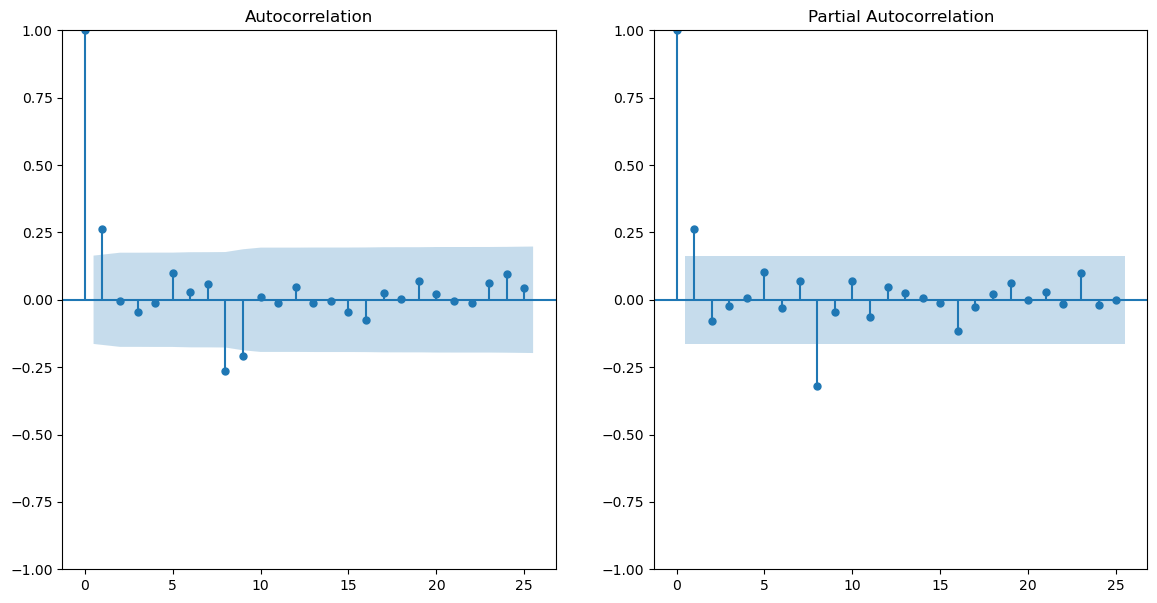

In [59]:
#plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, lags):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    plot_acf(series, lags=lags, ax=ax[0])
    plot_pacf(series, lags=lags, ax=ax[1])
    plt.show()

#Usage:
plot_acf_pacf(germany_wheat_prices['Value'], 25)


In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def plot_acf_pacf(series, lags):
    # Calculate ACF and PACF
    acf_values = acf(series, nlags=lags)
    pacf_values = pacf(series, nlags=lags)

    # Create subplots
    fig = make_subplots(rows=2, cols=1)

    # Add ACF trace
    fig.add_trace(
        go.Scatter(
            x=list(range(len(acf_values))),
            y=acf_values,
            mode='lines+markers',
            name='ACF'
        ), row=1, col=1
    )

    # Add PACF trace
    fig.add_trace(
        go.Scatter(
            x=list(range(len(pacf_values))),
            y=pacf_values,
            mode='lines+markers',
            name='PACF'
        ), row=2, col=1
    )

    # Update layout
    fig.update_layout(
        title="ACF and PACF",
        showlegend=False
    )

    fig.update_xaxes(title_text="Lag", row=2, col=1)
    fig.update_yaxes(title_text="ACF", row=1, col=1)
    fig.update_yaxes(title_text="PACF", row=2, col=1)

    # Show plot
    fig.show()

# Usage:
# Assuming 'germany_wheat_prices' is a DataFrame and 'Value' is a column with time series data.
plot_acf_pacf(germany_wheat_prices['Value'], 25)

In [18]:
def generate_predictions(last_date_in_data, pred_future, periods,  country):
    if isinstance(last_date_in_data, str):
        last_date_in_data = pd.to_datetime(last_date_in_data)

    # Generate a date range starting the first day of the next month after last_date_in_data
    # 'MS' stands for month start frequency
    future_dates = pd.date_range(start=last_date_in_data + pd.offsets.MonthBegin(1), periods=periods, freq='MS')
    # Create the predictions DataFrame with the pred_future list
    predictions = pd.DataFrame(pred_future, columns=['Predicted'])
    # Assign these dates as the index to the predictions DataFrame
    predictions.index = future_dates
    predictions.index.name = 'Date'

    predictions = (predictions["Predicted"] * germany_dp.stats['std'])  + germany_dp.stats['mean']

    return predictions

# Auto Regression

In [19]:
X = germany_wheat_prices['Value'].values

In [20]:
train = X[:len(X)-7]
test = X[len(X)-7:]

model_germany = AutoReg(train, lags=25).fit()

print(model_germany.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  136
Model:                    AutoReg(25)   Log Likelihood                 190.724
Method:               Conditional MLE   S.D. of innovations              0.043
Date:                Mon, 12 Feb 2024   AIC                           -327.447
Time:                        20:46:02   BIC                           -254.290
Sample:                            25   HQIC                          -297.770
                                  136                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.004      0.871      0.384      -0.005       0.012
y.L1           0.3723      0.095      3.928      0.000       0.187       0.558
y.L2          -0.0611      0.101     -0.604      0.5

In [21]:
pred_germany = model_germany.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [64]:
import plotly.graph_objects as go

def plot_prediction_vs_actual(pred_values, actual_values, x_labels=None, title='Predicted vs Actual Values'):
    """
    Plots predicted vs actual values using Plotly.

    :param pred_values: list or array-like, predicted values
    :param actual_values: list or array-like, actual values
    :param x_labels: list, the labels for the x-axis (e.g., dates or months). If None, indices will be used.
    :param title: str, the title of the plot
    """
    # Check if x_labels are provided, otherwise use index
    if x_labels is None:
        x_labels = list(range(len(pred_values)))

    # Create traces for predicted and actual values
    trace_pred = go.Scatter(
        x=x_labels,
        y=pred_values,
        mode='lines',
        name='Predicted'
    )
    
    trace_actual = go.Scatter(
        x=x_labels,
        y=actual_values,
        mode='lines',
        name='Actual'
    )
    
    # Create the figure and add both traces
    fig = go.Figure()
    fig.add_trace(trace_pred)
    fig.add_trace(trace_actual)
    
    # Update layout with title and axis labels
    fig.update_layout(
        title=title,
        xaxis_title="Months" if x_labels is None else "",
        yaxis_title="Value",
        legend_title="Legend"
    )
    
    # Show the figure
    fig.show()

# Example usage:
plot_prediction_vs_actual(pred_germany, test, title='Germany Wheat Price Prediction Comparison')

In [23]:
# Calculate the mean squared erro
from sklearn.metrics import mean_squared_error

def rmse_calc(x, y):  
  return np.sqrt(mean_squared_error(x, y))

rmse = rmse_calc(test, pred_germany)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.084


# Forecast

In [24]:
# future prediction
pred_future_germany = model_germany.predict(start=len(X)+1, end=len(X)+24, dynamic=False)
print("The future prediction for the next 7 days is:")
print(pred_future_germany)
print("Numbeer of predictions made: ", len(pred_future_germany))

The future prediction for the next 7 days is:
[-0.06178072  0.08962916  0.13135494  0.02554736 -0.04953827  0.07930706
  0.09171101 -0.05538782  0.17622449  0.10735425 -0.06162082  0.03773314
  0.12219533  0.0451184   0.00083656  0.1865561  -0.00647937 -0.08392302
  0.15288643  0.08262014 -0.01396911  0.07304067  0.13825747 -0.07521615]
Numbeer of predictions made:  24


In [25]:
last_date_in_data = germany_wheat_prices.index.max()

In [26]:
predictions_germany = generate_predictions(last_date_in_data, pred_future_germany, 24, 'Germany')

# Belgium

In [27]:
belgium_wheat_prices = belgium_wheat_prices.dropna()
print_heading('ADF Test for for Spain Wheat Prices')
perform_adfuller_test(belgium_wheat_prices['Value'])

------------------------------------------------------------
ADF TEST FOR FOR SPAIN WHEAT PRICES
------------------------------------------------------------
1. ADF :  -1.1561112330217336
2. P-Value :  0.6921850782169459
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 120
5. Critical Values :
	 1% :  -3.486055829282407
	 5% :  -2.8859430324074076
	 10% :  -2.5797850694444446


In [28]:
belgium_wheat_prices['Value'] = Preprocess_data(belgium_wheat_prices) \
                                .log_transform('Value') \
                                .differencing(interval=1)

In [29]:
belgium_wheat_prices = belgium_wheat_prices.dropna()
print_heading('ADF Test for for Spain Wheat Prices')
perform_adfuller_test(belgium_wheat_prices['Value'])

------------------------------------------------------------
ADF TEST FOR FOR SPAIN WHEAT PRICES
------------------------------------------------------------
1. ADF :  -9.883875257505784
2. P-Value :  3.7081076808401996e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


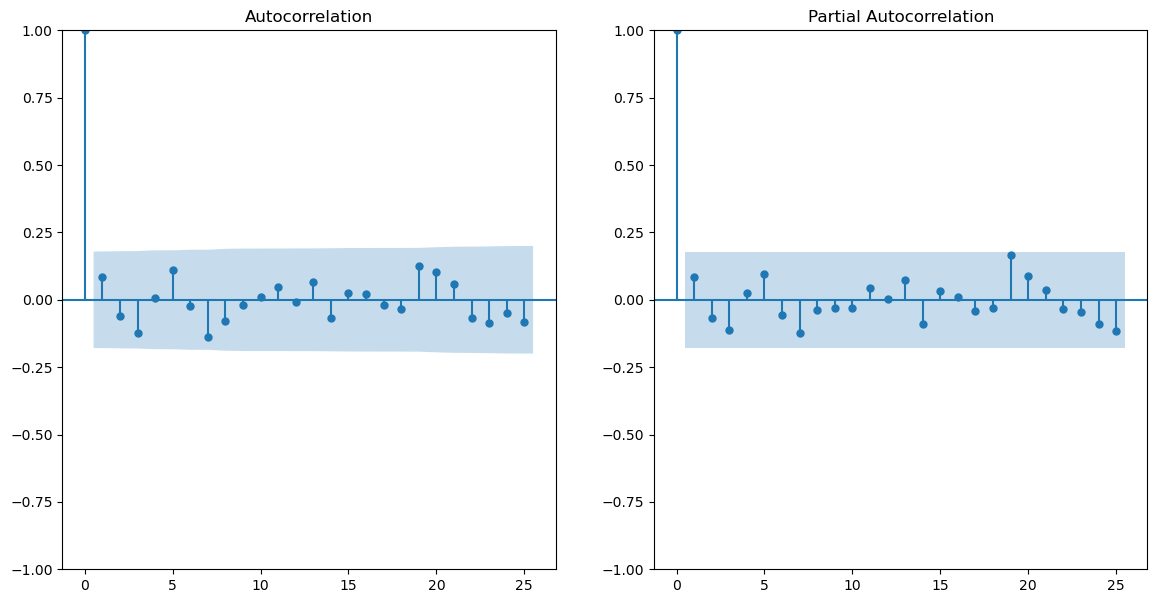

In [30]:
plot_acf_pacf(belgium_wheat_prices['Value'], 25)

In [31]:
X = belgium_wheat_prices['Value'].dropna().values

In [32]:
train = X[:len(X)-7]
test = X[len(X)-7:]

model_belgium = AutoReg(train, lags=20).fit()

print(model_belgium.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  113
Model:                    AutoReg(20)   Log Likelihood                 123.538
Method:               Conditional MLE   S.D. of innovations              0.064
Date:                Mon, 12 Feb 2024   AIC                           -203.076
Time:                        20:46:03   BIC                           -147.359
Sample:                            20   HQIC                          -180.579
                                  113                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.007      1.453      0.146      -0.003       0.023
y.L1           0.0568      0.101      0.564      0.573      -0.141       0.254
y.L2          -0.0083      0.110     -0.075      0.9

In [33]:
pred_belgium= model_belgium.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [66]:
plot_prediction_vs_actual(pred_belgium, test, title='Germany Wheat Price Prediction Comparison')

In [35]:
# Calculate the mean squared erro
rmse_belgium = rmse_calc(test, pred_belgium)
print('Test RMSE: %.3f' % rmse_belgium)

Test RMSE: 0.156


In [36]:
# future prediction
pred_future_belgium = model_belgium.predict(start=len(X)+1, end=len(X)+24, dynamic=False)
print("The future prediction for the next 7 days is:")
print(pred_future_belgium)
print("Numbeer of predictions made: ", len(pred_future_belgium))


The future prediction for the next 7 days is:
[ 0.0403265   0.08929894  0.05092429  0.1028789  -0.00551567  0.10191588
  0.10000741  0.08844285 -0.01737587  0.10623563  0.13066633  0.10170813
 -0.00531069  0.03654125  0.12320876  0.09468013  0.05682562  0.03547096
  0.1088856   0.09577291  0.09182598  0.05560501  0.12367966  0.0904571 ]
Numbeer of predictions made:  24


In [37]:
last_date_in_data = belgium_wheat_prices.index.max()

In [38]:
predictions_belgium = generate_predictions(last_date_in_data, pred_future_belgium, 24, country='Spain')

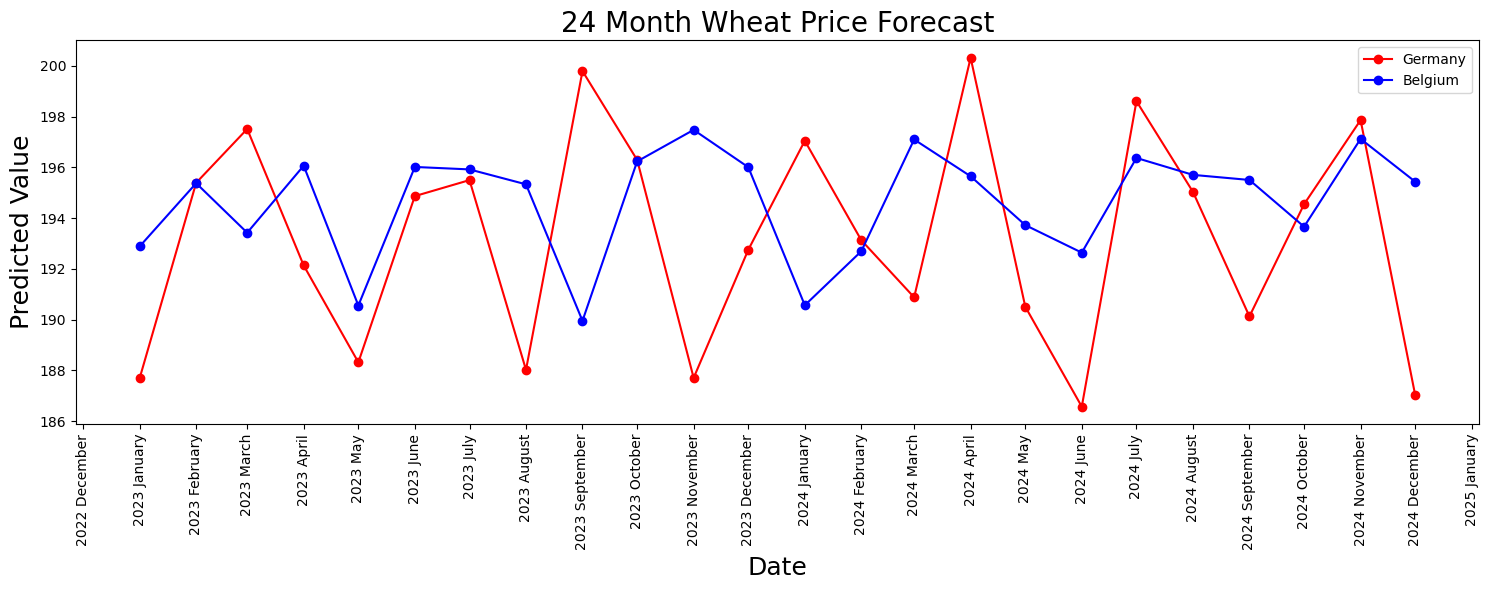

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_predictions(predictions, title='24 Month Wheat Price Forecast', xlabel='Date', ylabel='Predicted Value'):
    # Ensure that 'predictions' has a DateTime index

    # Plot the predictions
    plt.figure(figsize=(15,6))
    for prediction, label, color in predictions:
        plt.plot(prediction.index, prediction, label=label, color=color, marker='o')

    # Define the date format
    date_format = mdates.DateFormatter('%Y %B') 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Add title and labels
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)

    # Show legend
    plt.legend()

    # Rotate the date labels for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.tight_layout()  
    plt.show()


predictions = [
    (predictions_germany, 'Germany', 'red'),
    (predictions_belgium, 'Belgium', 'blue')
]
plot_predictions(predictions)

# ARIMA

In [40]:
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs

In [41]:
X =  germany_wheat_prices.dropna()
y = X['Value']

In [42]:
# arima_germany = ARIMA(train, order=(0,0,1)).fit()
model = auto_arima(y, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=-189.474, Time=0.32 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=-161.635, Time=0.05 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=-224.740, Time=0.24 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=-195.549, Time=0.09 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=-225.929, Time=0.38 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=-223.931, Time=0.81 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=-226.809, Time=1.23 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=-228.449, Time=1.20 sec
 ARIMA(1,2,0)(0,1,2)[12]             : AIC=-226.665, Time=13.27 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=-225.109, Time=13.66 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=-257.061, Time=0.73 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=-230.936, Time=0.18 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=-255.184, Time=1.34 sec
 ARIMA(2,2,0)(0,1,2)[1

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(5, 2, 1)x(0, 1, 1, 12)   Log Likelihood                 173.947
Date:                            Mon, 12 Feb 2024   AIC                           -331.893
Time:                                    20:47:33   BIC                           -309.015
Sample:                                02-01-2011   HQIC                          -322.597
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5828      0.101     -5.750      0.000      -0.781      -0.384
ar.L2         -0.5783      0.122     -4.757      0.000      -0.817      -0.340
ar.L3         -0.4093      0.133     -3.078      0.002      -0.670      -0.149
ar.L4         -0.2817      0.144     -1.952      0.051      -0.565       0.001
ar.L5         -0.1574      0.110     -1.430      0.153      -0.373       0.058
ma.L1         -0.9539      0.111     -8.632      0.000      -1.170      -0.737
ma.S.L12      -0.6683      0.142     -4.698      0.000      -0.947      -0.389
sigma2         0.0035      0.000     10.104      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               121.84
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             1.05
Prob(H) (two-sided):                  0.37   Kurtosis:                         7.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
forecast = model.predict(n_periods=12)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
def print_metrics(y, predictions):
    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y, predictions)
    print('MSE:', mse)

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)

    # Calculate the symmetric mean absolute percentage error (SMAPE)
    smape = np.mean(2.0 * np.abs(predictions - y) / (np.abs(y) + np.abs(predictions))) * 100
    print('SMAPE:', smape)

# Usage:
predictions = model.predict_in_sample()
print_metrics(y, predictions)

MAE: 0.05492361502009118
MSE: 0.0064339950268310474
RMSE: 0.08021218752054483
SMAPE: 138.09220541835353


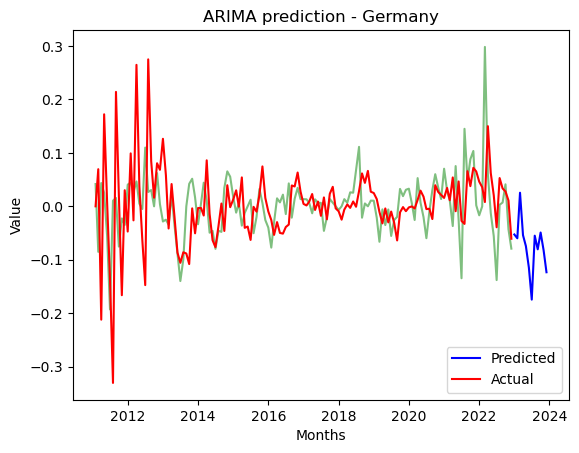

In [47]:

# import pyplot
from matplotlib import pyplot
pyplot.plot(y, color='green', alpha=0.5)
pyplot.plot(forecast, label='Predicted', color="#0000ff")
pyplot.plot(model.predict_in_sample(), label='Actual', color='red')

pyplot.xlabel('Months')
pyplot.ylabel('Value')
pyplot.title('ARIMA prediction - Germany')
pyplot.legend()
pyplot.show()

# SARIMA

In [48]:
import statsmodels.api as sm

p, d, q = 2, 0, 2

model= sm.tsa.statespace.SARIMAX(y, order=(p, d, q), seasonal_order=(p, d, q, 12))

model = model.fit()
model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53218D+00    |proj g|=  1.55497D+00

At iterate    5    f= -1.53414D+00    |proj g|=  6.55020D-01

At iterate   10    f= -1.53560D+00    |proj g|=  7.85973D-03

At iterate   15    f= -1.53570D+00    |proj g|=  1.24181D-01

At iterate   20    f= -1.53658D+00    |proj g|=  4.50027D-01

At iterate   25    f= -1.53690D+00    |proj g|=  4.37656D-02

At iterate   30    f= -1.53692D+00    |proj g|=  3.93791D-02

At iterate   35    f= -1.53767D+00    |proj g|=  2.84744D-01

At iterate   40    f= -1.54157D+00    |proj g|=  1.04164D-01

At iterate   45    f= -1.54224D+00    |proj g|=  9.76687D-03

At iterate   50    f= -1.54255D+00    |proj g|=  3.60208D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                 220.585
Date:                            Mon, 12 Feb 2024   AIC                           -423.169
Time:                                    20:47:40   BIC                           -396.504
Sample:                                02-01-2011   HQIC                          -412.333
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8271      0.391      2.114      0.034       0.060       1.594
ar.L2          0.1068      0.277      0.386      0.699      -0.435       0.649
ma.L1         -0.5609      0.390     -1.437      0.151      -1.326       0.204
ma.L2         -0.3850      0.303     -1.270      0.204      -0.979       0.209
ar.S.L12       0.2597      0.646      0.402      0.688      -1.007       1.526
ar.S.L24      -0.1640      0.915     -0.179      0.858      -1.958       1.630
ma.S.L12      -0.1516      0.655     -0.232      0.817      -1.435       1.132
ma.S.L24       0.3529      0.880      0.401      0.688      -1.372       2.078
sigma2         0.0027      0.000     13.576      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               518.52
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             1.41
Prob(H) (two-sided):                  0.10   Kurtosis:                        11.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred = model.predict(start=len(y), end=len(y)+12)

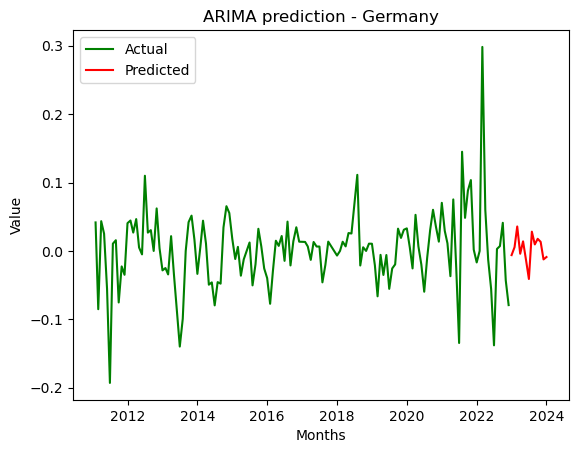

In [50]:
# import pyplot
from matplotlib import pyplot
pyplot.plot(y, label='Actual',color='green')
pyplot.plot(pred, label='Predicted', color='red')

pyplot.xlabel('Months')
pyplot.ylabel('Value')
pyplot.title('ARIMA prediction - Germany')
pyplot.legend()
pyplot.show()